In [227]:
# Importing libraries
import pandas as pd
import datetime
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics
import warnings
import sys
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

if not sys.warnoptions:
    warnings.simplefilter("ignore")
np.random.seed(42)

In [111]:
# 1) Loading the data

data = pd.read_csv("renttherunway.csv")
data.head()

,Unnamed: 0,fit,user_id,bust size,item_id,weight,rating,rented for,review_text,body type,review_summary,category,height,size,age,review_date
0,0,fit,420272,34d,2260466,137lbs,10.0,vacation,An adorable romper! Belt and zipper were a lit...,hourglass,So many compliments!,romper,"5' 8""",14,28.0,"April 20, 2016"
1,1,fit,273551,34b,153475,132lbs,10.0,other,I rented this dress for a photo shoot. The the...,straight & narrow,I felt so glamourous!!!,gown,"5' 6""",12,36.0,"June 18, 2013"
2,2,fit,360448,NaN,1063761,NaN,10.0,party,This hugged in all the right places! It was a ...,NaN,It was a great time to celebrate the (almost) ...,sheath,"5' 4""",4,116.0,"December 14, 2015"
3,3,fit,909926,34c,126335,135lbs,8.0,formal affair,I rented this for my company's black tie award...,pear,Dress arrived on time and in perfect condition.,dress,"5' 5""",8,34.0,"February 12, 2014"
4,4,fit,151944,34b,616682,145lbs,10.0,wedding,I have always been petite in my upper body and...,athletic,Was in love with this dress !!!,gown,"5' 9""",12,27.0,"September 26, 2016"


In [112]:
data.shape

(192544, 16)

In [113]:
# Deleting unwanted columns
data = data.drop(data.columns[[0,1]], axis=1)

In [114]:
# New dataframe
data.head()

,user_id,bust size,item_id,weight,rating,rented for,review_text,body type,review_summary,category,height,size,age,review_date
0,420272,34d,2260466,137lbs,10.0,vacation,An adorable romper! Belt and zipper were a lit...,hourglass,So many compliments!,romper,"5' 8""",14,28.0,"April 20, 2016"
1,273551,34b,153475,132lbs,10.0,other,I rented this dress for a photo shoot. The the...,straight & narrow,I felt so glamourous!!!,gown,"5' 6""",12,36.0,"June 18, 2013"
2,360448,NaN,1063761,NaN,10.0,party,This hugged in all the right places! It was a ...,NaN,It was a great time to celebrate the (almost) ...,sheath,"5' 4""",4,116.0,"December 14, 2015"
3,909926,34c,126335,135lbs,8.0,formal affair,I rented this for my company's black tie award...,pear,Dress arrived on time and in perfect condition.,dress,"5' 5""",8,34.0,"February 12, 2014"
4,151944,34b,616682,145lbs,10.0,wedding,I have always been petite in my upper body and...,athletic,Was in love with this dress !!!,gown,"5' 9""",12,27.0,"September 26, 2016"


In [115]:
# 2) Shaping
data.shape

(192544, 14)

In [116]:
# 3) Checking for duplicate records
data_duplicate = data.drop_duplicates(subset=None, keep='first', inplace = True, ignore_index= False)

In [117]:
# Post deleting duplicate records
data.shape

(192355, 14)

In [118]:
# 4) Deleting the Id columns as they are redundant
data = data.drop('user_id',axis=1)
data = data.drop('item_id', axis=1)

In [119]:
# Post deletion
data.shape

(192355, 12)

In [120]:
# 5) Checking the weight column
data['weight'] = data['weight'].str[:-3]
data['weight']

0         137
1         132
2         NaN
3         135
4         145
         ... 
192539    140
192540    100
192541    135
192542    165
192543    155
Name: weight, Length: 192355, dtype: object

In [121]:
data['weight'] = pd.to_numeric(data['weight'],downcast='float')
data.dtypes

bust size          object
weight            float32
rating            float64
rented for         object
review_text        object
body type          object
review_summary     object
category           object
height             object
size                int64
age               float64
review_date        object
dtype: object

In [122]:
# 6) Check the unique categories for the column 'rented for' and group 'party: cocktail' category with 'party'
data['rented for'].value_counts()

wedding            57737
formal affair      40380
party              35578
everyday           16810
other              15366
work               15029
date                7382
vacation            4062
party: cocktail        1
Name: rented for, dtype: int64

In [123]:
data['rented for'] = data['rented for'].replace({'party: cocktail':'party'})
data['rented for'].value_counts()

wedding          57737
formal affair    40380
party            35579
everyday         16810
other            15366
work             15029
date              7382
vacation          4062
Name: rented for, dtype: int64

In [124]:
# 7) The column 'height' is in feet with a quotation mark, Convert to inches with float datatype.
data['height'].value_counts()

5' 4"     27987
5' 6"     25649
5' 5"     24298
5' 7"     23995
5' 3"     20715
5' 2"     16744
5' 8"     16357
5' 9"     11355
5' 1"      7140
5' 10"     7035
5' 0"      4014
5' 11"     3109
6' 0"      1405
4' 11"     1013
6' 1"       364
4' 10"      212
6' 2"       124
4' 9"        60
6' 3"        31
4' 6"        20
6' 4"        18
4' 8"        17
4' 7"        16
6' 6"         2
Name: height, dtype: int64

In [125]:
data['height'] = data['height'].str.replace("'",".")

In [126]:
data['height']

0         5. 8"
1         5. 6"
2         5. 4"
3         5. 5"
4         5. 9"
          ...  
192539    5. 9"
192540    5. 1"
192541    5. 8"
192542    5. 6"
192543    5. 6"
Name: height, Length: 192355, dtype: object

In [127]:
data['height'] = data['height'].str.replace('"',"")
data['height']

0         5. 8
1         5. 6
2         5. 4
3         5. 5
4         5. 9
          ... 
192539    5. 9
192540    5. 1
192541    5. 8
192542    5. 6
192543    5. 6
Name: height, Length: 192355, dtype: object

In [128]:
data['height'] = data['height'].str.replace(' ',"")
data['height']

0         5.8
1         5.6
2         5.4
3         5.5
4         5.9
         ... 
192539    5.9
192540    5.1
192541    5.8
192542    5.6
192543    5.6
Name: height, Length: 192355, dtype: object

In [129]:
# Changing the datatype
data['height'] = pd.to_numeric(data['height'],downcast='float')
data['height']

0         5.8
1         5.6
2         5.4
3         5.5
4         5.9
         ... 
192539    5.9
192540    5.1
192541    5.8
192542    5.6
192543    5.6
Name: height, Length: 192355, dtype: float32

In [130]:
# converting to inches
data['height'] = data['height']*12

In [131]:
data

,bust size,weight,rating,rented for,review_text,body type,review_summary,category,height,size,age,review_date
0,34d,137.0,10.0,vacation,An adorable romper! Belt and zipper were a lit...,hourglass,So many compliments!,romper,69.600006,14,28.0,"April 20, 2016"
1,34b,132.0,10.0,other,I rented this dress for a photo shoot. The the...,straight & narrow,I felt so glamourous!!!,gown,67.199997,12,36.0,"June 18, 2013"
2,NaN,NaN,10.0,party,This hugged in all the right places! It was a ...,NaN,It was a great time to celebrate the (almost) ...,sheath,64.800003,4,116.0,"December 14, 2015"
3,34c,135.0,8.0,formal affair,I rented this for my company's black tie award...,pear,Dress arrived on time and in perfect condition.,dress,66.000000,8,34.0,"February 12, 2014"
4,34b,145.0,10.0,wedding,I have always been petite in my upper body and...,athletic,Was in love with this dress !!!,gown,70.800003,12,27.0,"September 26, 2016"
...,...,...,...,...,...,...,...,...,...,...,...,...
192539,34dd,140.0,10.0,work,Fit like a glove!,hourglass,LOVE IT!!! First Item Im thinking of buying!,jumpsuit,70.800003,8,42.0,"May 18, 2016"
192540,32c,100.0,10.0,work,The pattern contrast on this dress is really s...,petite,LOVE it!,dress,61.199997,4,29.0,"September 30, 2016"
192541,36a,135.0,6.0,everyday,"Like the other DVF wraps, the fit on this is f...",straight & narrow,"Loud patterning, flattering fit",dress,69.600006,8,31.0,"March 4, 2016"
192542,36c,165.0,10.0,wedding,This dress was PERFECTION. it looked incredib...,pear,loved this dress it was comfortable and photog...,dress,67.199997,16,31.0,"November 25, 2015"


In [132]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 192355 entries, 0 to 192543
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   bust size       173963 non-null  object 
 1   weight          162400 non-null  float32
 2   rating          192274 non-null  float64
 3   rented for      192345 non-null  object 
 4   review_text     192293 non-null  object 
 5   body type       177730 non-null  object 
 6   review_summary  192010 non-null  object 
 7   category        192355 non-null  object 
 8   height          191680 non-null  float32
 9   size            192355 non-null  int64  
 10  age             191395 non-null  float64
 11  review_date     192355 non-null  object 
dtypes: float32(2), float64(2), int64(1), object(7)
memory usage: 17.6+ MB


In [133]:
# 8. Check for missing values in each column of the dataset? If it exists, impute them with appropriate methods. (3)
data.isnull().sum()/len(data)*100

bust size          9.561488
weight            15.572769
rating             0.042110
rented for         0.005199
review_text        0.032232
body type          7.603130
review_summary     0.179356
category           0.000000
height             0.350914
size               0.000000
age                0.499077
review_date        0.000000
dtype: float64

In [134]:
data['weight'] = data['weight'].fillna(data['weight'].median())

In [135]:
data['bust size'] = data['bust size'].fillna(data['bust size'].mode())

In [136]:
data['rating'] = data['rating'].fillna(data['rating'].median())

In [137]:
data['body type'] = data['body type'].fillna(data['body type'].mode())

In [138]:
data['rented for'] = data['rented for'].fillna(data['rented for'].mode())

In [139]:
data['review_text'] = data['review_text'].fillna(data['review_text'].mode())

In [140]:
data['review_summary'] = data['review_summary'].fillna(data['review_summary'].mode())

In [141]:
data['height'] = data['height'].fillna(data['height'].median())

In [142]:
data['age'] = data['age'].fillna(data['age'].median())

In [143]:
# 9. Check the statistical summary for the numerical and categorical columns and write your findings
data.describe().T

,count,mean,std,min,25%,50%,75%,max
weight,192355.0,137.049698,20.143595,50.000000,125.000000,135.0,145.000000,300.000000
rating,192355.0,9.092709,1.429922,2.000000,8.000000,10.0,10.000000,10.000000
height,192355.0,65.699203,3.208073,49.199997,63.600002,66.0,68.399994,79.199997
size,192355.0,12.245801,8.496299,0.000000,8.000000,12.0,16.000000,58.000000
age,192355.0,33.860633,8.039386,0.000000,29.000000,32.0,37.000000,117.000000


Age column has a significantly high max value.

The rating column has an interesting distribution with 50%, 75% and max value being same

In [144]:
data_cat = ['bust size','rented for','review_text','body type','review_summary','category','review_date']
data_num = ['weight','rating','height','size','age']

In [145]:
data.describe(include = "object")

,bust size,rented for,review_text,body type,review_summary,category,review_date
count,173963,192345,192293,177730,192010,192355,192355
unique,106,8,191027,7,154736,68,2274
top,34b,wedding,.,hourglass,Stylist Review,dress,"June 15, 2016"
freq,27255,57737,63,55290,977,92752,843


In [146]:
# 9) Are there outliers present in the column age? If yes, treat them with the appropriate method.
data_num = data.select_dtypes(include = np.number)

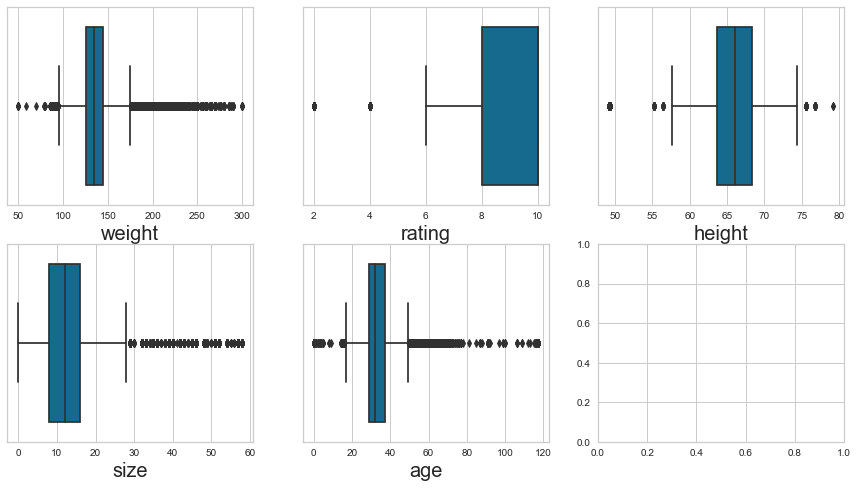

In [147]:
# plot the boxplot for each variable
# subplots(): plot subplots
# figsize(): set the figure size
fig, ax = plt.subplots(2, 3,figsize=(15, 8))

# plot the boxplot using boxplot() from seaborn
# z: let the variable z define the boxplot
# x: data for which the boxplot is to be plotted
# orient: "h" specifies horizontal boxplot (for vertical boxplots use "v")
# whis: proportion of the IQR past the low and high quartiles to extend the plot whiskers
# ax: specifies the axes object to draw the plot onto
# set_xlabel(): set the x-axis label
# fontsize: sets the font size of the x-axis label
for variable, subplot in zip(data_num.columns, ax.flatten()):
    z = sns.boxplot(x = data_num[variable], orient = "h",whis=1.5 , ax=subplot) # plot the boxplot
    z.set_xlabel(variable, fontsize = 20)                                     # set the x-axis label

In [148]:
# obtain the first quartile
Q1 = data_num.quantile(0.25)

# obtain the third quartile
Q3 = data_num.quantile(0.75)

# obtain the IQR
IQR = Q3 - Q1

# print the IQR
print(IQR)

weight    20.000000
rating     2.000000
height     4.799992
size       8.000000
age        8.000000
dtype: float64


In [149]:
data_num_iqr = data_num[~((data_num < (Q1 - 1.5 * IQR)) |(data_num > (Q3 + 1.5 * IQR))).any(axis=1)]

In [150]:
data_num_iqr.shape

(167078, 5)

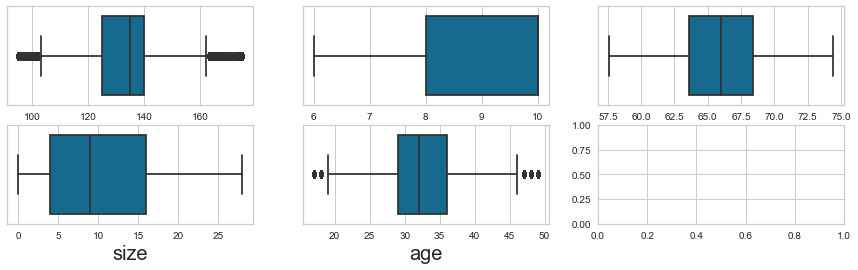

In [151]:
# consider the variables which has outliers
variables = ['weight','rating','height','size','age']

# plot the boxplot for each variable
# subplots(): plot subplots
# figsize(): set the figure size
fig, ax = plt.subplots(2, 3, figsize=(15, 4))

# plot the boxplot using boxplot() from seaborn
# z: let the variable z define the boxplot
# x: data for which the boxplot is to be plotted
# orient: "h" specifies horizontal boxplot (for vertical boxplots use "v")
# whis: proportion of the IQR past the low and high quartiles to extend the plot whiskers
# ax: specifies the axes object to draw the plot onto
# set_xlabel(): set the x-axis label
# fontsize: set the font size of the x-axis label
for variable, subplot in zip(data_num_iqr[variables], ax.flatten()):
    z = sns.boxplot(x=data_num_iqr[variable], orient = "h",whis=1.5 , ax=subplot)
    z.set_xlabel(variable, fontsize = 20)

<AxesSubplot:xlabel='rented for', ylabel='count'>

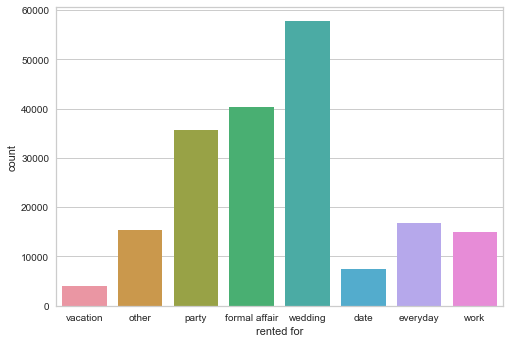

In [154]:
# 11) Check the distribution of the different categories in the column 'rented for' using appropriate plot.
sns.countplot(x=data['rented for'])

In [179]:
# 12) Encode the categorical variables in the dataset
data_cat = data.select_dtypes(include=object)
data.head()

,bust size,weight,rating,rented for,body type,category,height,size,age
0,34d,137.0,10.0,vacation,hourglass,romper,69.600006,14,28.0
1,34b,132.0,10.0,other,straight & narrow,gown,67.199997,12,36.0
2,NaN,135.0,10.0,party,NaN,sheath,64.800003,4,116.0
3,34c,135.0,8.0,formal affair,pear,dress,66.000000,8,34.0
4,34b,145.0,10.0,wedding,athletic,gown,70.800003,12,27.0


In [170]:
# Dropping unwanted columns 
data = data.drop('review_text',axis=1)
data = data.drop('review_summary',axis=1)
data = data.drop('review_date', axis=1)
data.shape

(192355, 9)

In [181]:
data['rented for'].value_counts()

wedding          57737
formal affair    40380
party            35579
everyday         16810
other            15366
work             15029
date              7382
vacation          4062
Name: rented for, dtype: int64

In [184]:
# Label encoding 'rented for'
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
data['rented for'] = labelencoder.fit_transform(data['rented for'])
data.head()

,bust size,weight,rating,rented for,body type,category,height,size,age
0,34d,137.0,10.0,5,hourglass,romper,69.600006,14,28.0
1,34b,132.0,10.0,3,straight & narrow,gown,67.199997,12,36.0
2,NaN,135.0,10.0,4,NaN,sheath,64.800003,4,116.0
3,34c,135.0,8.0,2,pear,dress,66.000000,8,34.0
4,34b,145.0,10.0,6,athletic,gown,70.800003,12,27.0


In [186]:
data['body type'].value_counts()

hourglass            55290
athletic             43631
petite               22113
pear                 22105
full bust            14993
straight & narrow    14727
apple                 4871
Name: body type, dtype: int64

In [187]:
# Label encoding 'body type'
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
data['body type'] = labelencoder.fit_transform(data['body type'])
data.head()

,bust size,weight,rating,rented for,body type,category,height,size,age
0,34d,137.0,10.0,5,3,romper,69.600006,14,28.0
1,34b,132.0,10.0,3,6,gown,67.199997,12,36.0
2,NaN,135.0,10.0,4,7,sheath,64.800003,4,116.0
3,34c,135.0,8.0,2,4,dress,66.000000,8,34.0
4,34b,145.0,10.0,6,1,gown,70.800003,12,27.0


In [188]:
data['category'].value_counts()

dress         92752
gown          44377
sheath        19264
shift          5364
jumpsuit       5184
              ...  
caftan            4
overcoat          2
sweatpants        2
crewneck          1
buttondown        1
Name: category, Length: 68, dtype: int64

In [189]:
# Label encoding 'category'
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
data['category'] = labelencoder.fit_transform(data['category'])
data.head()

,bust size,weight,rating,rented for,body type,category,height,size,age
0,34d,137.0,10.0,5,3,44,69.600006,14,28.0
1,34b,132.0,10.0,3,6,20,67.199997,12,36.0
2,NaN,135.0,10.0,4,7,45,64.800003,4,116.0
3,34c,135.0,8.0,2,4,16,66.000000,8,34.0
4,34b,145.0,10.0,6,1,20,70.800003,12,27.0


In [190]:
# Label encoding 'bust size'
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
data['bust size'] = labelencoder.fit_transform(data['bust size'])
data.head()

,bust size,weight,rating,rented for,body type,category,height,size,age
0,39,137.0,10.0,5,3,44,69.600006,14,28.0
1,37,132.0,10.0,3,6,20,67.199997,12,36.0
2,106,135.0,10.0,4,7,45,64.800003,4,116.0
3,38,135.0,8.0,2,4,16,66.000000,8,34.0
4,37,145.0,10.0,6,1,20,70.800003,12,27.0


In [191]:
# 13. Standardize the data, so that the values are within a particular range
ds = data.copy()

scaler = StandardScaler()
scaler.fit(ds)
scaled_ds = pd.DataFrame(scaler.transform(ds),columns= ds.columns)

In [192]:
# Scaled dataset
scaled_ds

,bust size,weight,rating,rented for,body type,category,height,size,age
0,-0.295947,-0.000987,0.634506,0.514334,-0.142478,1.569358,1.214661,0.206467,-0.728992
1,-0.384976,-0.249205,0.634506,-0.456681,1.434292,-0.307229,0.466760,-0.028930,0.266111
2,2.686522,-0.100274,0.634506,0.028827,1.959882,1.647549,-0.281138,-0.970519,10.217146
3,-0.340462,-0.100274,-0.764176,-0.942188,0.383112,-0.619994,0.092811,-0.499725,0.017336
4,-0.384976,0.396163,0.634506,0.999841,-1.193658,-0.307229,1.588610,-0.028930,-0.853380
...,...,...,...,...,...,...,...,...,...
192350,-0.206918,0.147945,0.634506,1.485349,-0.142478,0.161918,1.588610,-0.499725,1.012439
192351,-0.919150,-1.837806,0.634506,1.485349,0.908702,-0.619994,-1.402988,-0.970519,-0.604604
192352,0.104683,-0.100274,-2.162857,-1.427695,1.434292,-0.619994,1.214661,-0.499725,-0.355828
192353,0.238226,1.389039,0.634506,0.999841,0.383112,-0.619994,0.466760,0.441864,-0.355828


In [196]:
#14. Apply PCA on the above dataset and determine the number of PCA components to be used so that 90-95% of the variance in data is explained by the same.
cov_matrix = np.cov(scaled_ds.T)
print('Covariance matrix','\n',cov_matrix)

Covariance matrix 
 [[ 1.00000520e+00  2.94142455e-01 -2.13837501e-03  4.00668504e-03
   6.57054989e-02 -8.09696162e-03  5.59671703e-02  3.69823103e-01
   7.31399441e-02]
 [ 2.94142455e-01  1.00000520e+00 -2.08146864e-02  9.76944891e-03
  -1.96739661e-01 -1.43644127e-02  2.28363906e-01  7.23384824e-01
   6.30084412e-02]
 [-2.13837501e-03 -2.08146864e-02  1.00000520e+00  1.27511901e-02
   1.76600083e-02 -2.36431047e-02  9.82748075e-03 -3.67102503e-02
  -3.51273353e-02]
 [ 4.00668504e-03  9.76944891e-03  1.27511901e-02  1.00000520e+00
   4.07271576e-03 -5.75661266e-02 -8.67443574e-03  4.92588472e-03
  -3.82102780e-02]
 [ 6.57054989e-02 -1.96739661e-01  1.76600083e-02  4.07271576e-03
   1.00000520e+00 -3.32603812e-03 -1.00761043e-01 -1.71651909e-01
  -5.70054381e-02]
 [-8.09696162e-03 -1.43644127e-02 -2.36431047e-02 -5.75661266e-02
  -3.32603812e-03  1.00000520e+00 -3.52529063e-03 -5.53708190e-03
   2.44900488e-02]
 [ 5.59671703e-02  2.28363906e-01  9.82748075e-03 -8.67443574e-03
  -1.007

In [197]:
## Calculating eigen values and eigen vectors
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
print('Eigen vectors:','\n',eig_vecs)
print('\n')
print('Eigen values:','\n',eig_vals)

Eigen vectors: 
 [[ 3.75614310e-01  8.18796720e-02  7.30149445e-01 -3.05969754e-01
  -4.56865963e-01 -9.00539505e-03 -1.04529501e-01  2.67240176e-02
   7.08922549e-02]
 [ 5.99210962e-01  6.85584107e-01 -3.68581540e-01 -4.53383857e-02
   7.37135238e-02  1.43873238e-01 -3.54060016e-02 -2.12110205e-04
   7.50060888e-02]
 [-3.84492710e-02 -1.08761942e-02 -3.27954091e-02 -3.36156953e-01
   1.80926402e-01  6.90187988e-02 -6.54654756e-01 -2.90486635e-01
  -5.77817474e-01]
 [ 1.32399039e-03 -8.04633930e-04  1.10205384e-02 -5.00206126e-01
   2.32651149e-01 -2.03830156e-01  4.69797770e-01 -6.45108071e-01
   1.30852291e-01]
 [-2.10838414e-01  5.29028903e-03 -4.81794291e-01 -4.09867312e-01
  -5.81292856e-01 -3.60859364e-01 -1.81378023e-01  1.21769303e-01
   1.98885917e-01]
 [-9.54531339e-03  5.36020239e-03 -4.11110543e-03  4.94962192e-01
  -2.44775448e-01  3.89058262e-03 -3.55411127e-01 -6.57222076e-01
   3.69712861e-01]
 [ 2.41842234e-01 -7.90760095e-02  1.09591506e-01  7.30657952e-02
   4.390408

In [198]:
## Calculating the Variance explained and the cummulative variance explained
total = sum(eig_vals)
var_exp = [ (i/total)*100  for i in sorted(eig_vals,reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print('Variance Explained: ',var_exp)
print('Cummulative Variance Explained: ',cum_var_exp)

Variance Explained:  [23.320569608267405, 12.227331481550223, 12.112563184448884, 11.15171710759033, 10.73215665393655, 10.445312355784067, 9.704323732487632, 7.398875769093374, 2.9071501068415233]
Cummulative Variance Explained:  [ 23.32056961  35.54790109  47.66046427  58.81218138  69.54433804
  79.98965039  89.69397412  97.09284989 100.        ]


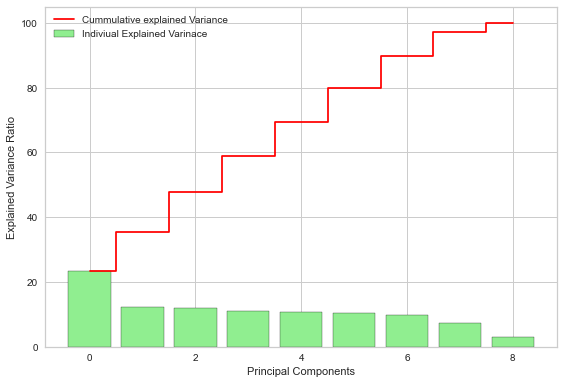

In [205]:
## Scree plot
plt.bar(range(9),var_exp, align='center',color='lightgreen',edgecolor='black',label='Indiviual Explained Varinace')
plt.step(range(9), cum_var_exp, where='mid',color='red',label='Cummulative explained Variance')
plt.legend(loc = 'best')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.tight_layout()
plt.show()

In [208]:
## Fitting the PCA model
pca=PCA(n_components = 9)
pca.fit(scaled_ds)

PCA(n_components=9)

In [209]:
data_pca = pca.transform(scaled_ds)
data_pca = pd.DataFrame(data_pca,columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9'])
data_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
0,0.184468,0.281919,-0.819164,-1.247699,-0.977872,1.263895,0.529154,0.066501,0.328616
1,-0.481307,-0.467800,0.470543,-0.789410,0.362089,-0.519073,0.891957,0.855867,0.197108
2,1.442724,2.542338,5.976435,1.532729,5.766646,2.483783,5.460477,-0.872202,-1.727589
3,-0.513755,0.405713,0.206749,0.211907,-0.147564,-1.304315,0.170634,0.224575,-0.262105
4,0.556763,-0.456303,-2.294504,-0.320995,-0.329979,0.384148,0.456090,-0.355815,-0.048557


In [213]:
# 15) a)Find the optimal K Value using elbow plot for K Means clustering
cluster_range = range(1,15)
cluster_errors = []

for num_clusters in cluster_range:
   
    clusters = KMeans(num_clusters, n_init=10)
    clusters.fit(data_pca)
    
    labels = clusters.labels_
    centroids = clusters.cluster_centers_
    
    cluster_errors.append(clusters.inertia_)

clusters_df = pd.DataFrame({'num_clusters':cluster_range, 
                           'cluster_errors':cluster_errors})

clusters_df

,num_clusters,cluster_errors
0,1,1.731195e+06
1,2,1.486747e+06
2,3,1.354047e+06
3,4,1.254994e+06
4,5,1.151556e+06
5,6,1.079809e+06
6,7,1.019488e+06
7,8,9.631692e+05
8,9,9.310467e+05
9,10,9.038328e+05


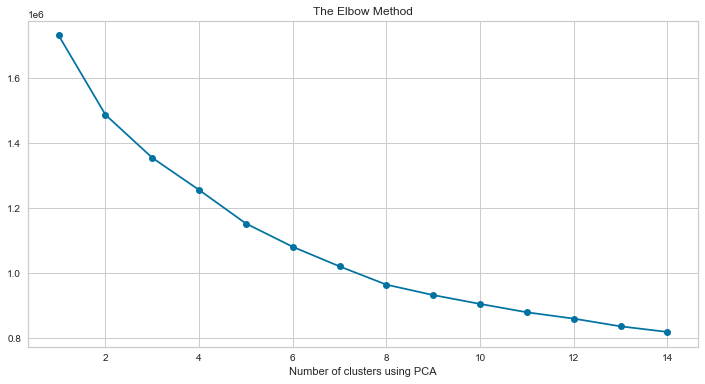

In [214]:
## 15) b. Build a Kmeans clustering model using the obtained optimal K value from the elbow plot.
## Elbow method
plt.figure(figsize=[12,6])
plt.title('The Elbow Method')
plt.xlabel('Number of clusters using PCA')
plt.plot(clusters_df['num_clusters'],clusters_df['cluster_errors'],marker='o',color='b')
plt.show()

- From the Elbow plot, we can see that at K=4 the interia starts to drop significantly. So we will do it using 4 clusters. 
- The clusters are labeled as 0,1,2,3.

In [215]:
## Fit the KMeans clustering model using the obtained optimal K
kmeans = KMeans(n_clusters=4, n_init=15, random_state=2345)
kmeans.fit(data_pca)

KMeans(n_clusters=4, n_init=15, random_state=2345)

In [216]:
## obtained labels from kmeans clustering
kmeans.labels_

array([0, 1, 3, ..., 1, 2, 2])

In [217]:
## Creating a new dataframe only for labels.
df_labels = pd.DataFrame(kmeans.labels_, columns=list(['Labels']))
df_labels.head(5)

,Labels
0,0
1,1
2,3
3,1
4,2


In [218]:
## 15) c) Compute silhouette score for evaluating the quality of the K Means clustering technique.
from sklearn.metrics import silhouette_score

kmeans_score = []

for i in range(2,15):
    kmeans = KMeans(n_clusters=i)
    kmeans = kmeans.fit(data_pca)
    labels = kmeans.predict(data_pca)
    print(i,silhouette_score(data_pca,labels))

2 0.153652711591446
3 0.15020632691891797
4 0.1627774120917226
5 0.13477796816108126
6 0.1410773017346122
7 0.143723991614851
8 0.1325243536840121
9 0.13048220307464128
10 0.12235171617707463
11 0.12401706831035592
12 0.12346149422413533
13 0.12738798431697887
14 0.1287698595020289


 - From above, we can observe that for 4 clusters the silhoutte score is highest, we can choose optimal clusters as 4.

In [229]:
data_pca

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
0,0.184468,0.281919,-0.819164,-1.247699,-0.977872,1.263895,0.529154,0.066501,0.328616
1,-0.481307,-0.467800,0.470543,-0.789410,0.362089,-0.519073,0.891957,0.855867,0.197108
2,1.442724,2.542338,5.976435,1.532729,5.766646,2.483783,5.460477,-0.872202,-1.727589
3,-0.513755,0.405713,0.206749,0.211907,-0.147564,-1.304315,0.170634,0.224575,-0.262105
4,0.556763,-0.456303,-2.294504,-0.320995,-0.329979,0.384148,0.456090,-0.355815,-0.048557
...,...,...,...,...,...,...,...,...,...
192350,0.256079,-0.272661,-1.020573,0.092498,0.418638,1.130106,1.924532,-0.136775,-0.391847
192351,-2.679768,-1.545388,-0.020376,0.702507,0.356580,0.770748,-0.327809,0.281738,0.588080
192352,-0.302387,0.503747,0.775149,0.218817,-1.631788,-2.411318,1.211452,0.227732,-0.200004
192353,1.149844,-1.420568,-0.555023,-0.102100,-0.064886,0.251000,0.211787,0.592727,-0.580801


In [ ]:
## 16) Apply Agglomerative clustering and segment the data.
## a)Find the optimal K Value using dendrogram for Agglomerative clustering.


plt.figure(figsize=[18,7])
merg = linkage(data_pca, method='single')
dendrogram(merg, leaf_rotation=90,)
plt.xlabel('Datapoints')
plt.ylabel('Euclidean distance')
plt.show()

In [235]:
## b. Build a Agglomerative clustering model using the obtained optimal K value observed from dendrogram.
## Building hierarchical clustering model using the optimal clusters as 4
hie_cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean',
                                     linkage='ward')
hie_cluster_model = hie_cluster.fit(data_pca)

MemoryError: Unable to allocate 138. GiB for an array with shape (18500126835,) and data type float64

In [234]:
## Creating a dataframe of the labels
df_label1 = pd.DataFrame(hie_cluster_model.labels_,columns=['Labels'])
df_label1.head(5)

NameError: name 'hie_cluster_model' is not defined

In [ ]:
## c. Compute silhouette score for evaluating the quality of the Agglomerative clustering technique.

for i in range(2,15):
    hier = AgglomerativeClustering(n_clusters=i)
    hier = hier.fit(data_pca)
    labels = hier.fit_predict(data_pca)
    print(i,silhouette_score(data_pca,labels))